[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         0.9        1.         ... 1.         1.         1.        ]
 ...
 [0.97647059 0.91764706 0.92941176 ... 0.92941176 0.96470588 0.95294118]
 [0.97777778 0.91111111 0.93333333 ... 0.95555556 0.97777778 0.95555556]
 [0.97894737 0.90526316 0.92631579 ... 0.94736842 0.95789474 0.95789474]]
(18, 100)


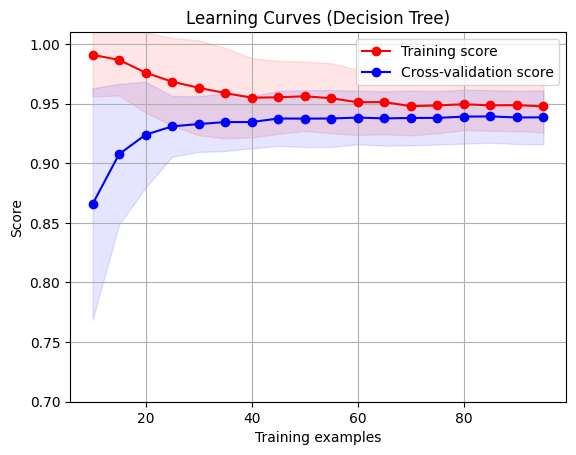

In [ ]:
# Data Science for Medicine and Biology
#
# Nezu Life Sciences
#
# Feel free to modify, redistribute and above all,
# create something with this code.
#
# Tiago Lopes, PhD
# March 2024

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.naive_bayes import GaussianNB

# Load the breast cancer dataset
X, y = load_breast_cancer(return_X_y=True)

estimator = GaussianNB()

# Cross-validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

train_sizes=range(10,100,5)

train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=8, train_sizes=train_sizes)

print(train_scores)
print(test_scores.shape)
# Mean and standard deviation of training set scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

# Mean and standard deviation of test set scores
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Time to plot the results
title = "Learning Curves (Decision Tree)"

plt.figure()
plt.title(title)

plt.ylim((0.7, 1.01))
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
 train_scores_mean + train_scores_std, alpha=0.1, color="r")

plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
 test_scores_mean + test_scores_std, alpha=0.1, color="b")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="b", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

